In [1]:
import numpy as np
import pandas as pd
import ghibtools as gh
import matplotlib.pyplot as plt
from params import *
from configuration import *
from compute_rsa import rsa_job
from bibliotheque import df_baseline
import seaborn as sns

In [2]:
savefolder = base_folder / 'Figures' / 'RSA'

In [3]:
rows_df = []

ncols = len(session_keys)

for sub in subject_keys:
    print(sub)
    
    fig, axs = plt.subplots(ncols = ncols, figsize = (13,5), constrained_layout = True)
    fig.suptitle(f'Heart rate according to respiration phase in {sub}', y = 1.05, fontsize = 20)
    
    for c, session in enumerate(session_keys):
        run_key = f'{sub}_{session}'
        rsa = rsa_job.get(run_key)['rsa']
        phase = rsa.coords['phase'].values
        
        ax = axs[c]

        N = rsa.coords['cycle'].size

        mean_rsa = rsa.mean('cycle')
        rsa_delta =float(np.max(mean_rsa) - np.min(mean_rsa))
        rows_df.append([sub, session, rsa_delta])

        for cycle in rsa.coords['cycle'].values:
            ax.plot(phase, rsa.loc[cycle,:].values, color = 'k', lw = 0.4, alpha = 0.4)
        ax.plot(phase, mean_rsa.values, color = 'orange', lw = 5)
        ax.set_title(f'{session} - N : {N} - RSA : {round(rsa_delta, 2)} bpm') 
        ax.axvline(rsa_params['segment_ratios'], color = 'r')
        ax.set_ylim(30, 120)
        ax.set_ylabel('Heart Beat [bpm]')
        ax.set_xlabel('Respiratory phase')

    fig.savefig(savefolder / 'by_subject' / f'{sub}.png', bbox_inches = 'tight')
    plt.close()
        

P01
rsa is processing ('P01_baseline',)
rsa is processing ('P01_music',)
rsa is processing ('P01_odor',)
P02
rsa is processing ('P02_baseline',)
rsa is processing ('P02_music',)
rsa is processing ('P02_odor',)
P03
rsa is processing ('P03_baseline',)
rsa is processing ('P03_music',)
rsa is processing ('P03_odor',)
P04
rsa is processing ('P04_baseline',)
rsa is processing ('P04_music',)
rsa is processing ('P04_odor',)
P05
rsa is processing ('P05_baseline',)
rsa is processing ('P05_music',)
rsa is processing ('P05_odor',)
P06
rsa is processing ('P06_baseline',)
rsa is processing ('P06_music',)
rsa is processing ('P06_odor',)
P07
rsa is processing ('P07_baseline',)
rsa is processing ('P07_music',)
rsa is processing ('P07_odor',)
P08
rsa is processing ('P08_baseline',)
rsa is processing ('P08_music',)
rsa is processing ('P08_odor',)
P09
rsa is processing ('P09_baseline',)
rsa is processing ('P09_music',)
rsa is processing ('P09_odor',)
P10
rsa is processing ('P10_baseline',)
rsa is processi

In [4]:
df_rsa = pd.DataFrame(rows_df, columns = ['participant','session','rsa_amplitude'])
# df_rsa.to_excel(base_folder / 'Tables' / 'rsa.xlsx')

In [5]:
df_rsa = df_rsa[df_rsa['participant'] != 'P02']

In [6]:
df_rsa

participant   session  rsa_amplitude
0          P01  baseline       3.326309
1          P01     music       3.396746
2          P01      odor       3.447517
6          P03  baseline      13.242375
7          P03     music      10.198030
..         ...       ...            ...
88         P30     music       3.175661
89         P30      odor       3.901231
90         P31  baseline       5.413651
91         P31     music       5.882433
92         P31      odor       6.254417

[90 rows x 3 columns]

In [7]:
df_rsa_baseline = df_baseline(df = df_rsa, indexes = ['participant','session'] , metrics = ['rsa_amplitude'])

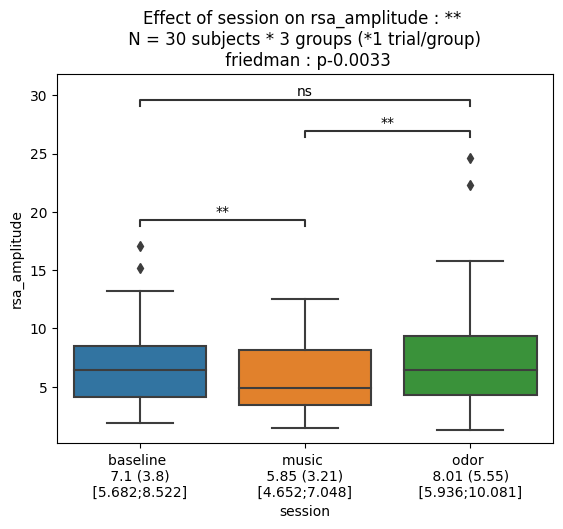

In [8]:
fig, ax = plt.subplots()
gh.auto_stats(df = df_rsa, predictor = 'session', outcome = 'rsa_amplitude', design = 'within', subject = 'participant', ax=ax)
file = savefolder / 'raw_rsa.png'
fig.savefig(file, bbox_inches = 'tight')

In [9]:
df_rsa_baseline

participant session  rsa_amplitude
0          P01    odor       1.036439
1          P03    odor       0.950605
2          P04    odor       1.883343
3          P05    odor       1.185396
4          P06    odor       2.354176
5          P07    odor       1.619227
6          P08    odor       1.309203
7          P09    odor       1.070432
8          P10    odor       1.212068
9          P11    odor       1.680854
10         P12    odor       0.842681
11         P13    odor       1.092586
12         P14    odor       0.583976
13         P15    odor       1.088282
14         P16    odor       0.692672
15         P17    odor       0.861425
16         P18    odor       0.822499
17         P19    odor       0.800974
18         P20    odor       0.904864
19         P21    odor       0.948856
20         P22    odor       0.519861
21         P23    odor       0.608677
22         P24    odor       0.762339
23         P25    odor       1.914487
24         P26    odor       1.812477
25         P27    odor       1.160335
26         P28    odor       0.863814
27         P29    odor       0.802045
28         P30    odor       0.941886
29         P31    odor       1.155305
30         P01   music       1.021176
31         P03   music       0.770106
32         P04   music       0.867205
33         P05   music       0.709077
34         P06   music       0.960428
35         P07   music       0.825962
36         P08   music       0.694763
37         P09   music       0.897834
38         P10   music       1.105796
39         P11   music       0.726600
40         P12   music       0.890687
41         P13   music       1.002939
42         P14   music       0.215717
43         P15   music       1.056915
44         P16   music       1.201724
45         P17   music       1.399564
46         P18   music       0.771816
47         P19   music       0.987108
48         P20   music       0.827083
49         P21   music       1.034037
50         P22   music       0.735444
51         P23   music       0.472666
52         P24   music       0.591236
53         P25   music       0.965716
54         P26   music       1.227928
55         P27   music       0.799791
56         P28   music       0.803947
57         P29   music       0.349334
58         P30   music       0.766709
59         P31   music       1.086592

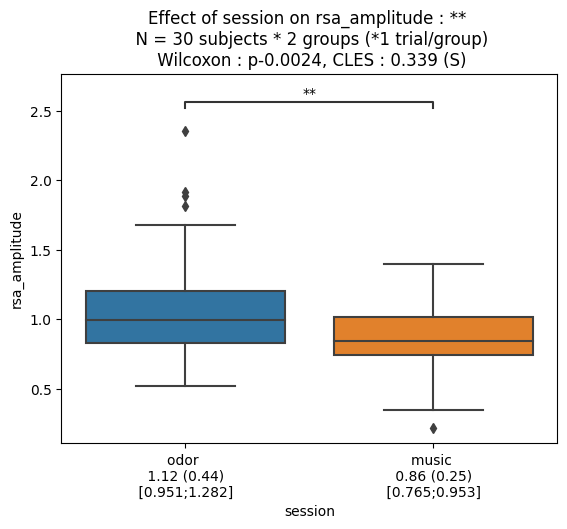

In [10]:
fig, ax = plt.subplots()
gh.auto_stats(df = df_rsa_baseline, predictor = 'session', outcome = 'rsa_amplitude', design = 'within', subject = 'participant', ax=ax)
file = savefolder / 'rsa_ratio_to_baseline.png'
fig.savefig(file, bbox_inches = 'tight')